<a href="https://colab.research.google.com/github/willdphan/heart-disease/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease

This dataset contains health characteristics that serve as indicators, providing insights into the health status of individuals.

The primary challenge here is to utilize these indicators to accurately predict whether a given subject has been diagnosed with any of the three age-related conditions.

This task is framed as a binary classification problem, where the two possible outcomes are: the subject has been diagnosed with one of the conditions, or the subject has not been diagnosed with any of the conditions.

It's worth noting that the data has been meticulously curated to ensure anonymity, preserving the privacy of the individuals while still retaining the essential features required for effective prediction.

It emphasizes the importance of understanding the underlying patterns within the data, which could potentially lead to better diagnostic tools or interventions for age-related conditions in the future.

Dataset is from [Kaggle](https://www.kaggle.com/datasets/bharath011/heart-disease-classification-dataset).

> ## Steps to Heart Disease Prediction

>>[Import Libraries](#scrollTo=VmplvmJXJ-54)

>>[Read Data](#scrollTo=U41_r_sRJ-55)

>>[Check describe() Method on Dataset](#scrollTo=sGJ_5vlSJ-57)

>>[Check for Null Values](#scrollTo=LFEaRIn-J-57)

>>[Data Visualizations](#scrollTo=s-s5IcrtJ-58)

>>[Split Data](#scrollTo=tOMxBpx2J-5-)

>>[List Models](#scrollTo=3c1emHxpJ-5-)

>>[Choose Best Models](#scrollTo=tW3SXBc5J-5-)

>>[Hyperparameters for Best Models](#scrollTo=HfSOIxFLJ-5-)

>>[Grab Best Parameters of Best Models](#scrollTo=nWxpwLe6J-5_)

>>[Use on Unseen Data and Get Accuracy Scores](#scrollTo=Qp6xsvBKJ-5_)

>>[Determine Order of Feature Importance](#scrollTo=p4OseXnnJ-6D)



### Import Libraries
Import the libraries uses for data analysis, modeling.

In [ ]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Warnings
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-classification-dataset/Heart Attack.csv


### Read Data

* **age:** Age of the patient
* **gender:** Gender of the patient
* **impluse:** Heartrate of the patient
* **pressurehight:** Systolic blood pressure
* **pressurelow:** Diastolic blood pressure
* **glucose:** Glucose level
* **kcm:** Creatine kinase-MB (Some fancy word for an enzyme found in heart muscle cells)
* **troponin:** Troponin level
* **class:** Whether the patient has heart disease or not (target variable)

In [ ]:
data = pd.read_csv('/kaggle/input/heart-disease-classification-dataset/Heart Attack.csv')

In [ ]:
data

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


Rename some of the columns!

In [ ]:
data.rename(columns={'pressurehight' : 'pressure_high', 'pressurelow' : 'pressure_low'}, inplace=True)

In [ ]:
data.columns

Index(['age', 'gender', 'impluse', 'pressure_high', 'pressure_low', 'glucose',
       'kcm', 'troponin', 'class'],
      dtype='object')

### Check `describe()` Method on Dataset

* **Age:** On average, individuals are 56 years old, ranging from 14 to 103 years.

* **Gender:** Categorized as binary, where 1 might denote males and 0 females. With a mean of 0.66, there seems to be a male dominance in the dataset.

* **Impulse:** The mean stands at 78, but with a high standard deviation of 52. Notably, the maximum value exceeds the 75th percentile, hinting at possible outliers.

* **Pressurehigh & Pressurelow:** These metrics capture blood pressure readings, averaging at 127 and 72 respectively.

* **Glucose: **The typical glucose level hovers around 147, with values spanning from 35 to 541.

* **Kcm:** With an average close to 15, its wide-ranging values are evident from a high standard deviation. The maximum value surpasses the 75th percentile, indicating potential outliers.

* **Troponin:** Averaging at 0.36, its high standard deviation and a maximum value beyond the 75th percentile suggest the presence of outliers.

* **Class:** Serving as the outcome variable, "positive" emerges as the predominant class, implying a majority of the dataset's patients suffer from heart disease.

In [ ]:
data.describe()

,age,gender,impluse,pressure_high,pressure_low,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


# Check for Null Values
Zero null values!

In [ ]:
data.isnull().sum()

age              0
gender           0
impluse          0
pressure_high    0
pressure_low     0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [ ]:
data.shape

(1319, 9)

### Data Visualizations
Create Histograms and Heatmap to see correlation between data.

In [ ]:
columns = data.columns

After Plotting Histograms...

* **age:** The distribution for both classes appears to be somewhat normal, but
the positive class seems to have a higher density for ages around 60.

* *impluse:** For the positive class, the density is highest around a value of 80. For the negative class, the density is highest around a value of 60. There are also a few outliers in this feature.

* **pressurehight and pressurelow:** The distributions for both features seem to be approximately normal, with some outliers.

* **glucose:** The distribution is skewed to the right for both classes, with a higher density around lower values.

* **kcm and troponin:** Both features have a right-skewed distribution with several outliers. It might be beneficial to apply a transformation to these features to reduce the skewness.

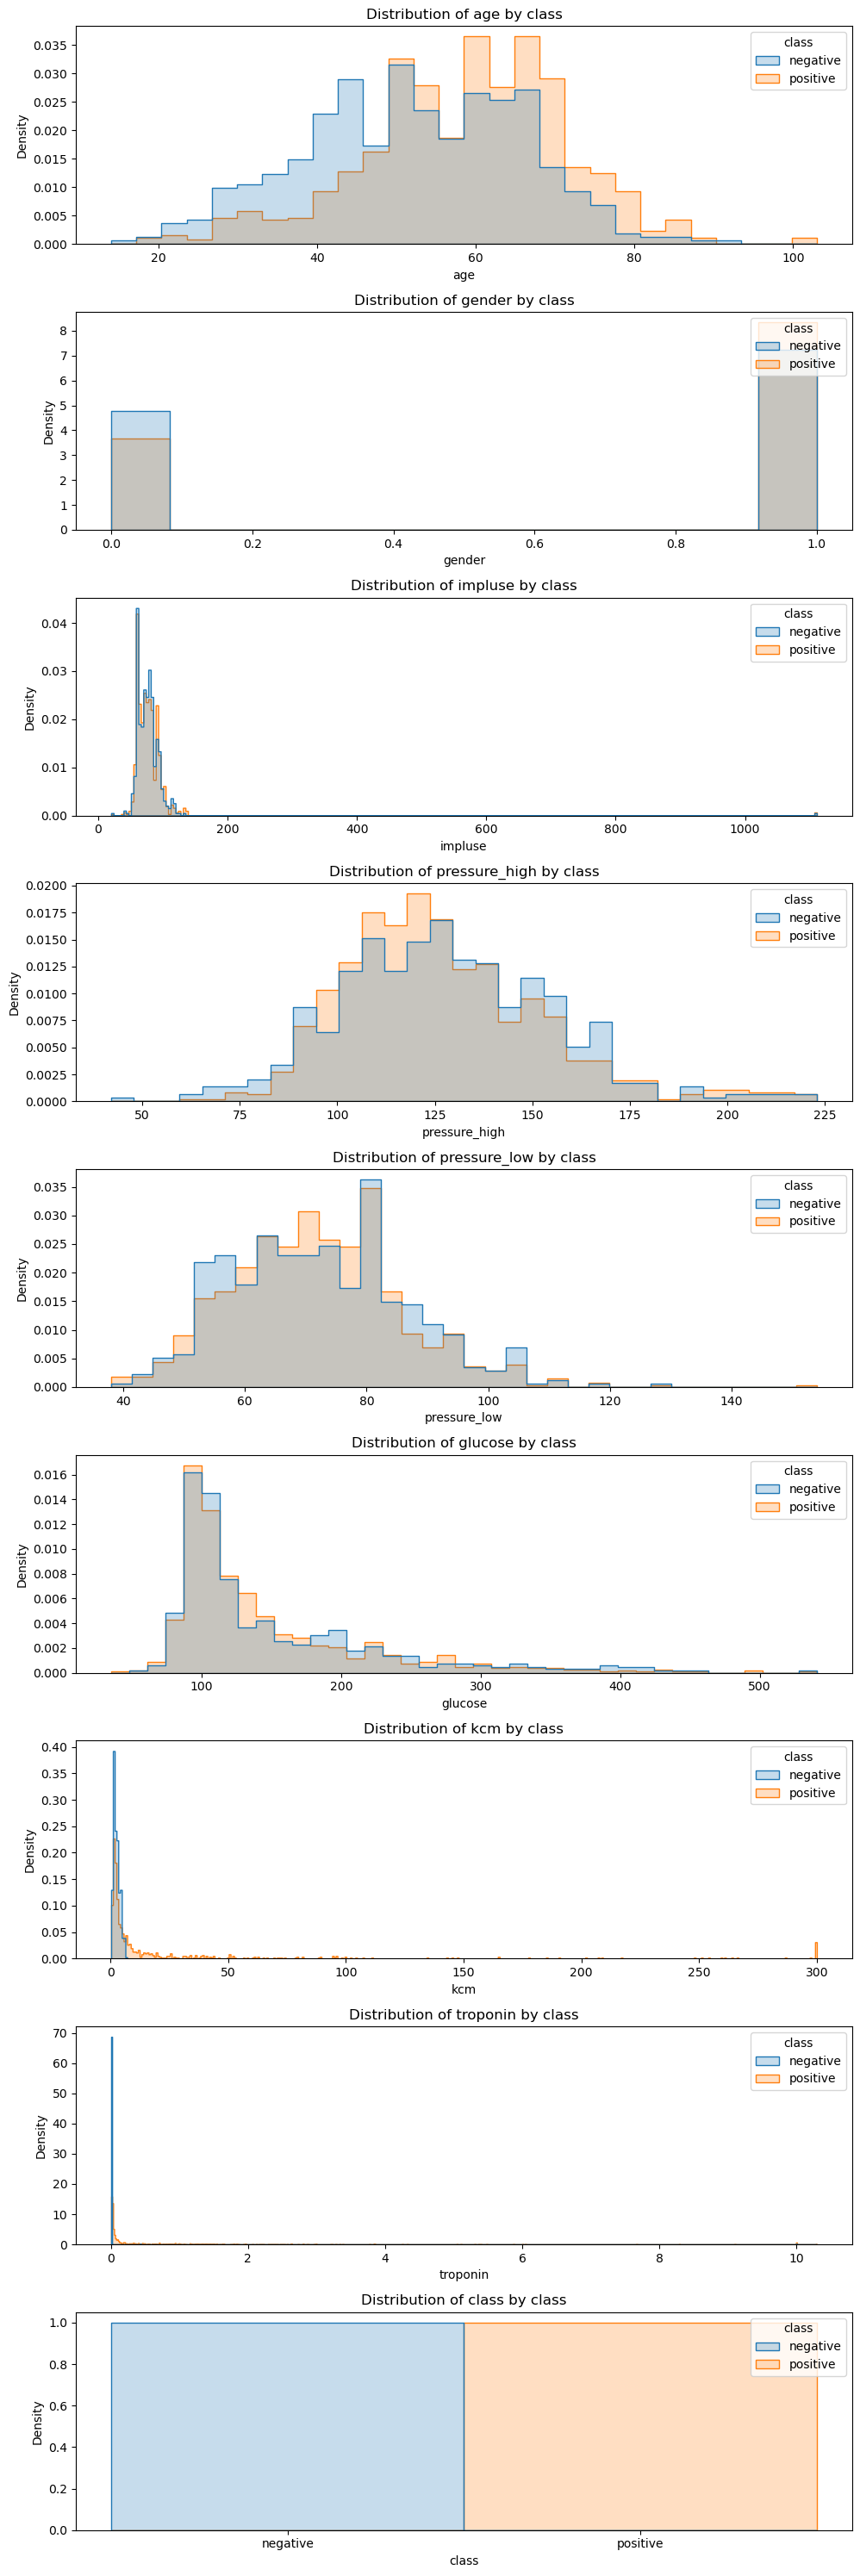

In [ ]:
# Create subplots
fig, axs = plt.subplots(len(columns),figsize=(10, 30))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Create histogram for each column
for i, col in enumerate(columns):
    ax = sns.histplot(data=data, x=col, hue="class",element="step", stat="density", common_norm=False, ax=axs[i])
    axs[i].set_title(f'Distribution of {col} by class')

# If there are more subplots than columns, turn off the remaining subplots
if len(columns) < len(axs):
    for i in range(len(columns), len(axs)):
        axs[i].axis('off')

plt.tight_layout()

plt.show()


We currently have a class column that's an object type.

In [ ]:
data['class']

0       negative
1       positive
2       negative
3       positive
4       negative
          ...   
1314    negative
1315    positive
1316    positive
1317    positive
1318    positive
Name: class, Length: 1319, dtype: object

Below, we add a column to dataset that take the class columna and converts it to numerical data. This is done to be able to use in the heatmap.

In the heatmap below...
* **kcm, troponin, and age:** we can assume that these have the highest correlation to class_numeric
* **gender:** has a moderate correlation
* **impulse, pressure_high, pressure_low, glucose:** have low correlation

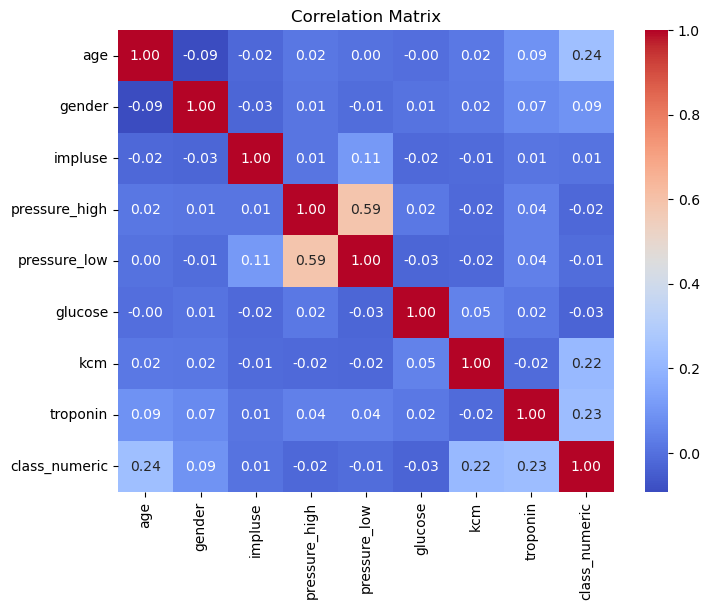

In [ ]:
data['class_numeric'] = data['class'].map({'negative': 0, 'positive': 1})

corr_matrix = data.corr()

plt.figure(figsize=(8,6))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
data

,age,gender,impluse,pressure_high,pressure_low,glucose,kcm,troponin,class,class_numeric
0,64,1,66,160,83,160.0,1.80,0.012,negative,0
1,21,1,94,98,46,296.0,6.75,1.060,positive,1
2,55,1,64,160,77,270.0,1.99,0.003,negative,0
3,64,1,70,120,55,270.0,13.87,0.122,positive,1
4,55,1,64,112,65,300.0,1.08,0.003,negative,0
...,...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative,0
1315,66,1,84,125,55,149.0,1.33,0.172,positive,1
1316,45,1,85,168,104,96.0,1.24,4.250,positive,1
1317,54,1,58,117,68,443.0,5.80,0.359,positive,1


### Split Data

Now that we have done EDA, we can begin splitting and training data. Drop the numerical class column we previously created.

In [ ]:
from sklearn.model_selection import train_test_split

# drop the numeric results col
data = data.drop('class_numeric', axis=1)

Just convert the original class column to binary data and split dataset into `X_train, X_test, y_train, y_test. `

In [ ]:
# Map the class column to binary
data['class'] = data['class'].map({'negative': 0, 'positive': 1})

# Split the dataset into features (X) and target variable (y)
X = data.drop('class', axis=1)
y = data['class']

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1055, 8), (1055,), (264, 8), (264,))

### List Models
Here, we are using...

* Logistic Regression
* Random Forests
* Gradient Boosting

With these models, we create a for loop that preprocesses the data with a `StandardScaler()` along with the classifier type. Afterwards, it prints the array of `5` cross validation scores.

In [ ]:
# Create a dictionary of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Dictionary to store the cross-validation scores
cv_scores = {}

# Cross-validation and store the results
for name, classifier in classifiers.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores[name] = scores

cv_scores

{'Logistic Regression': array([0.77251185, 0.8056872 , 0.81042654, 0.79146919, 0.81042654]),
 'Random Forest': array([0.98104265, 0.98104265, 0.97630332, 1.        , 0.99052133]),
 'Gradient Boosting': array([0.98578199, 0.99526066, 0.98578199, 0.98578199, 0.99052133])}

### Choose Best Models
We see that `GB` and `RF` are the best two of the three models, so let's hyperparameterize these models with `GridSearchCV`.

In [ ]:
# SK Pipelines for the classifiers/models
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline_gb = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

### Hyperparameters for Best Models
These dictionaries are used to define a range of hyperparameter values for Random Forest and Gradient Boosting models. When used with Grid Search, the algorithms will be trained and evaluated on all possible combinations of these hyperparameters to find the best set for optimal performance.

**`param_grid_rf (Random Forest Hyperparameters):`**

* `classifier__n_estimators`: Specifies the number of trees in the Random Forest. The model will be trained and evaluated for 100, 200, and 300 trees.
* `classifier__max_depth`: The maximum depth of each tree. The model will be tested with trees having unlimited depth (None), a maximum depth of 5, and a maximum depth of 10.
* `classifier__min_samples_split`: The minimum number of samples required to split an internal node. The model will be evaluated for splits requiring a minimum of 2, 5, or 10 samples.
* `classifier__min_samples_leaf`: The minimum number of samples required to be at a leaf node. The model will be tested with leaf nodes having a minimum of 1, 2, or 4 samples.

**`param_grid_gb (Gradient Boosting Hyperparameters):`**

* `classifier__n_estimators`: Specifies the number of boosting stages (trees) to be run. The model will be trained and evaluated for 100, 200, and 300 stages.
* `classifier__learning_rate`: The rate at which the model adjusts based on errors from previous stages. The model will be tested with learning rates of 0.01, 0.1, and 1.
* `classifier__max_depth`: The maximum depth of each tree. The model will be evaluated with trees having a maximum depth of 3, 5, and 10.

In [ ]:
# Hyperparameter grid for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
}

# Hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 1],
    'classifier__max_depth': [3, 5, 10],
}

Pass in the parameter grids into the `GridSearchCV` and fit the datasets.

In [ ]:
# Grid Search
# For RF, attach pipeline and hyperparams to grid search, set num of CVs
# n_jobs=-1: The number of jobs is set to the number of CPU cores in your machine
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# For GB, attach pipeline and hyperparams to grid search, set num of CVs
grid_search_gb = GridSearchCV(pipeline_gb, param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01, 0.1, 1],
                         'classifier__max_depth': [3, 5, 10],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='accuracy')

### Grab Best Parameters of Best Models

In [ ]:
# grab best RF and GB models and scores
best_model_rf, best_score_rf = grid_search_rf.best_estimator_, grid_search_rf.best_score_
best_model_gb, best_score_gb = grid_search_gb.best_estimator_, grid_search_gb.best_score_

best_model_rf, best_score_rf, best_model_gb, best_score_gb

(Pipeline(steps=[('scaler', StandardScaler()),
                 ('classifier',
                  RandomForestClassifier(n_estimators=300, random_state=42))]),
 0.9867298578199051,
 Pipeline(steps=[('scaler', StandardScaler()),
                 ('classifier',
                  GradientBoostingClassifier(learning_rate=0.01, max_depth=5,
                                             random_state=42))]),
 0.9933649289099525)

### Use on Unseen Data and Get Accuracy Scores

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the unseen test set using the Random Forest model
y_pred_rf = best_model_rf.predict(X_test)

# Make predictions on the unseen test set using the Gradient Boosting model
y_pred_gb = best_model_gb.predict(X_test)

# Calculate accuracy scores by getting y_test to y_pred ratio
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print(f'Random Forests Report')
print(classification_report(y_test, y_pred_rf))
print(f'The accuracy of Random Forests Classifier is {accuracy_rf}')

print(f'Gradient Boosting Report')
print(classification_report(y_test, y_pred_gb))
print(f'The accuracy of Gradient Boosting Classifier is {accuracy_gb}')

Random Forests Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       101
           1       0.98      0.99      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264

The accuracy of Random Forests Classifier is 0.9810606060606061
Gradient Boosting Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       101
           1       0.98      0.99      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264

The accuracy of Gradient Boosting Classifier is 0.9810606060606061


### Determine Order of Feature Importance

The higher the importance value, the more crucial the feature is in the decision-making process of the model.

Note that from the data:

* **troponin** is the most important feature for both models, with the highest importance values.
* **kcm** is the second most important feature for both models.
* The importance rankings differ slightly between the two models for the other features. For instance, age is the third most important feature for `RF` but ranks seventh for `GB`.

In summary, **troponin and kcm** are the top two most important features for both the Random Forest and Gradient Boosting models based on the provided data.

In [ ]:
# Get feature importances from the Random Forest model
importances_rf = best_model_rf.named_steps['classifier'].feature_importances_

# Get feature importances from the Gradient Boosting model
importances_gb = best_model_gb.named_steps['classifier'].feature_importances_

# Convert to DataFrame for easier visualization
df_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance_RF': importances_rf,
    'Importance_GB': importances_gb,
})

df_importances.sort_values(by='Importance_RF', ascending=False)

,Feature,Importance_RF,Importance_GB
7,troponin,0.583581,0.605395
6,kcm,0.261279,0.363246
0,age,0.052331,0.000372
5,glucose,0.028663,0.006627
3,pressure_high,0.024978,0.004166
4,pressure_low,0.021024,0.001313
2,impluse,0.017836,0.000258
1,gender,0.010308,0.018622
